<a href="https://colab.research.google.com/github/teddy-teem/ImageProcessing/blob/develop/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Image Processing Technique

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def drawTwoImage(image1, image2):
  fig = plt.figure()
  plt.title("Image Difference Show")
  ax = fig.add_subplot(1,2,1)
  ax.imshow(image1)
  plt.axis('off')
  ax = fig.add_subplot(1,2,2)
  ax.imshow(image2)
  plt.axis('off')

Mirror an image & show subplot

In [101]:
def mirror(image): #numpy ndarray
  print(image.shape)
  x,y,z = image.shape
  mirrorImage = np.zeros((x,y,z), dtype="int32");
  for i in range(x):
    for j in range(y):
      mirrorImage[i,j,0]=image[i][y-j-1][0];
      mirrorImage[i,j,1]=image[i][y-j-1][1];
      mirrorImage[i,j,2]=image[i][y-j-1][2];
  drawTwoImage(image, mirrorImage)
  return mirrorImage;


(1100, 1100, 3)


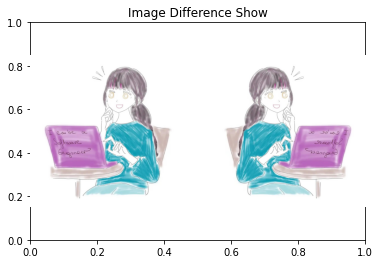

In [102]:
basicImage = np.array([[[1,200,255], [1,20,255], [1,200,25]]]);
realIamge = plt.imread("./smile.jpg");
m_im = mirror(realIamge);

## Flip an image, Upside Down

In [103]:
def flipImage(image):
  x,y,z = image.shape
  flippedIamge=np.zeros((x,y,z), dtype="int64")
  for i in range(x):
    for j in range(y):
      flippedIamge[i][j][0]=image[x-i-1][j][0]
      flippedIamge[i][j][1]=image[x-i-1][j][1]
      flippedIamge[i][j][2]=image[x-i-1][j][2]
  drawTwoImage(image, flippedIamge);
  return flippedIamge;

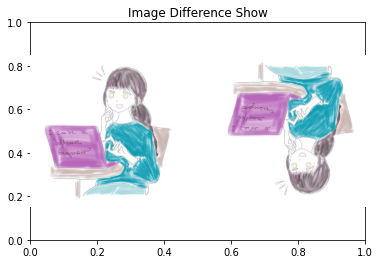

In [104]:
# basicImage = np.array([[[1,200,255], [1,20,255], [1,200,25]]]);
realIamge = plt.imread("./smile.jpg");
m_im = flipImage(realIamge);
# m_im

## Negative an Image

In [105]:
def negativeImage(image):
  x,y,z = image.shape
  negativeIm = np.zeros((x,y,z), dtype="int64")
  for i in range(x):
    for j in range(y):
      negativeIm[i][j][0]= 255 - image[i][j][0]
      negativeIm[i][j][1]= 255 - image[i][j][1]
      negativeIm[i][j][2]= 255 - image[i][j][2]
  drawTwoImage(image, negativeIm);
  return negativeIm

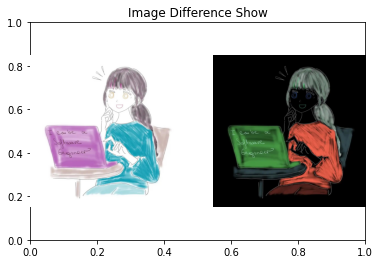

In [106]:
realIamge = plt.imread("./smile.jpg");
m_im = negativeImage(realIamge);

In [107]:
def negativeImageOnlyNonZeroPixels(image):
  x,y,z = image.shape
  negativeIm = np.zeros((x,y,z), dtype="int64")
  for i in range(x):
    for j in range(y):
      if image[i][j][0]!=255 :
        negativeIm[i][j][0]= 255 - image[i][j][0]
      else:
        negativeIm[i][j][0]=image[i][j][0]
      if image[i][j][1]!=255 :
        negativeIm[i][j][1]= 255 - image[i][j][1]
      else:
        negativeIm[i][j][1]=image[i][j][1]
      if image[i][j][2]!=255 :
        negativeIm[i][j][2]= 255 - image[i][j][2]
      else:
        negativeIm[i][j][2]=image[i][j][2]
  drawTwoImage(image, negativeIm);
  return negativeIm

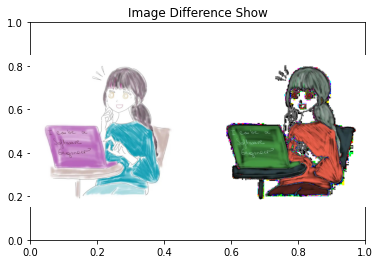

In [108]:
realIamge = plt.imread("./smile.jpg");
m_im = negativeImageOnlyNonZeroPixels(realIamge);